In [ ]:
"""
    attempt at writing / adjusting the Bayes model to be able to infer biological parameters instead of distribution parameters

free variables:
            * nu_bar: mean firingrate of the distribution
    * alpha_0: heterogeneity of the distribution
    * tau_A: AMPA time constant
    * tau_N: NMDA time constant
    * n: mixing parameter
"""

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

root_dir = Path.cwd().parent
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))

from inference.BayesModel import BayesModel, run_sampling
from empirical.readData import ModelParams

from DM_theory.functions import get_nu_max, get_gamma, get_delta
from DM_theory.functions import get_nu_bar, get_alpha_0, get_tau_I


In [3]:
mP = ModelParams(
    mode="artificial",
    parameter={"distr": [{"gamma": 1.7, "delta": 4.5, "nu_max": 25.0}],"T": 100, "N": 1000},
)
# BM, results, sampler = run_sampling(mP, mode="dynesty", n_live=1000, biological=True, nP=8)
BM, results, sampler = run_sampling(
    mP, mode="dynesty", n_live=100, bias_to_expected_max=1, biological=False, nP=8
)
# BM = BayesModel(mP)
# BM.prepare_data(mP, mode="rates")

{'distr': [{'gamma': 1.7, 'delta': 4.5, 'nu_max': 25.0}], 'T': 100, 'N': 1000}
input parameters: gamma=1.7, delta=4.5, nu_max=25.0, 
inferred parameters: rateWnt=[1.5959540910682242], tau_I=[0.004052847345693511], alpha_0=[array([[0.0346501]])], 
running nested sampling


867it [00:34, 24.78it/s, +100 | bound: 15 | nc: 1 | ncall: 21406 | eff(%):  4.539 | loglstar:   -inf < -957.468 <    inf | logz: -966.026 +/-  0.287 | dlogz:  0.009 >  1.000]


(<Figure size 1200x900 with 6 Axes>,
 array([[<Axes: xlabel='$-\\ln X$', ylabel='$x_{1}$'>,
         <Axes: xlabel='$x_{1}$'>],
        [<Axes: xlabel='$-\\ln X$', ylabel='$x_{2}$'>,
         <Axes: xlabel='$x_{2}$'>],
        [<Axes: xlabel='$-\\ln X$', ylabel='$x_{3}$'>,
         <Axes: xlabel='$x_{3}$'>]], dtype=object))

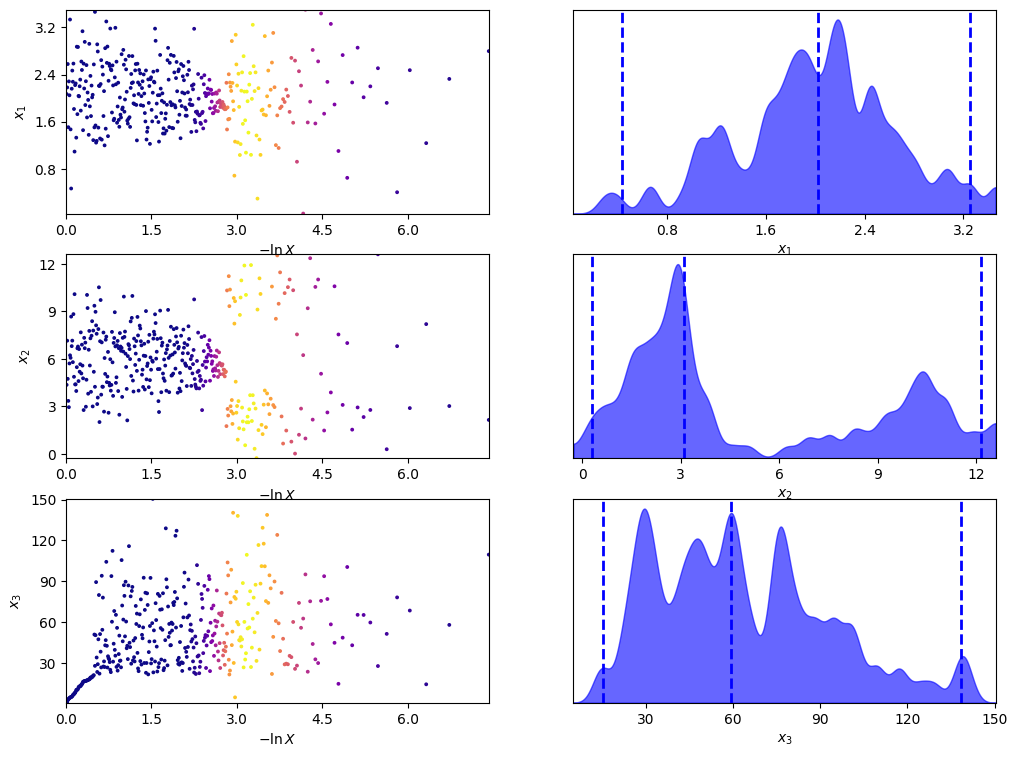

In [16]:
from dynesty import plotting as dyplot
import matplotlib.pyplot as plt

dyplot.traceplot(sampler.results)

data in:
distr = [{'gamma': 1.7, 'delta': 4.5, 'nu_max': 25.0}]
gamma_0 mean: 1.9829806553157914
delta_0 mean: 5.156690198872323
nu_max_0 mean: 63.06991906546676


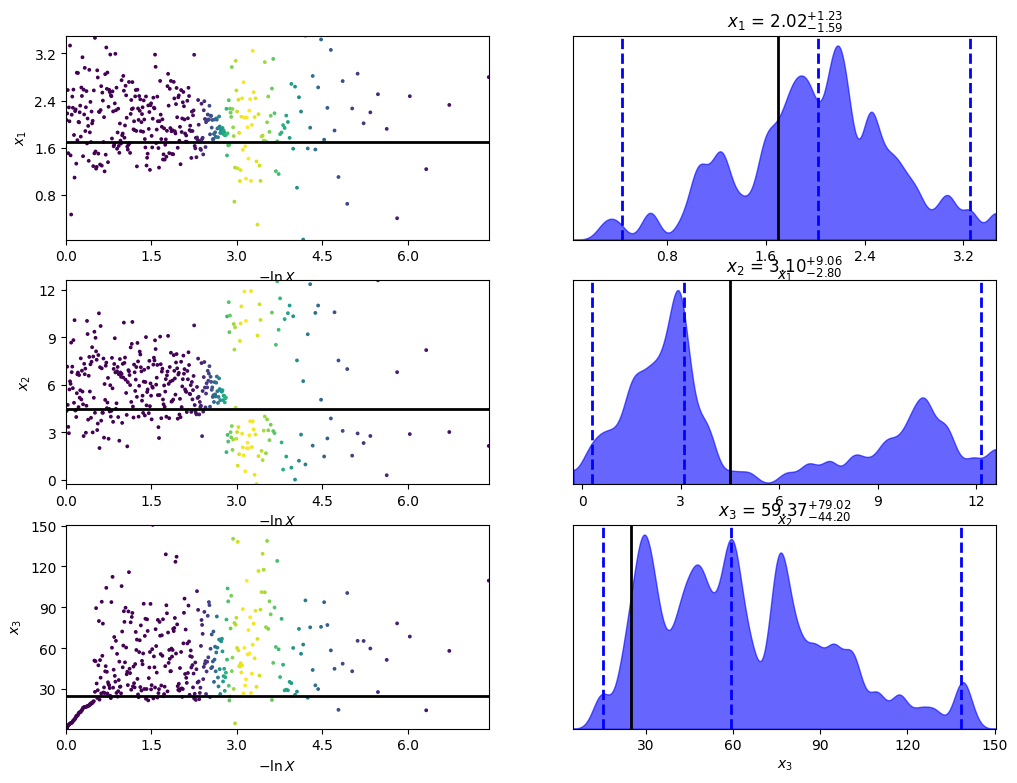

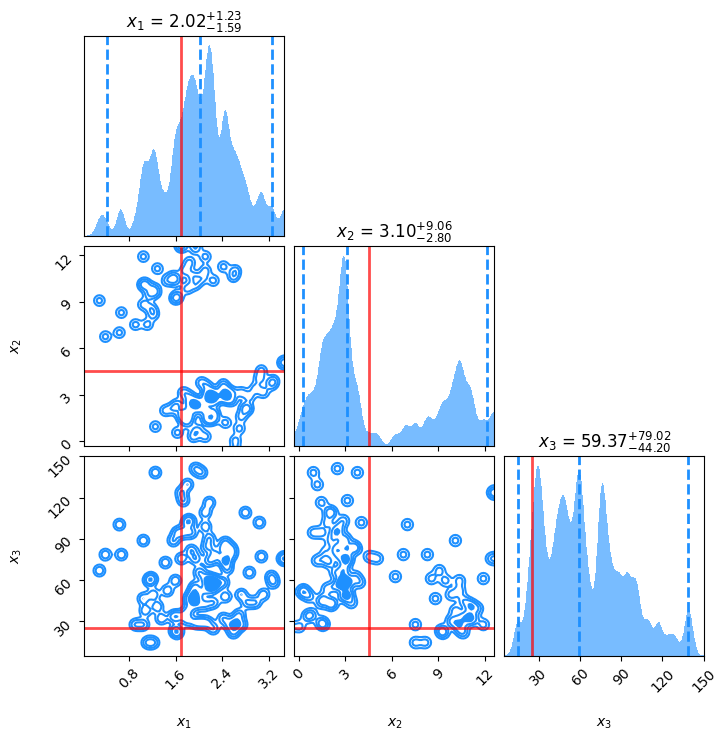


results {'gamma_0': 1.9829806553157914, 'delta_0': 5.156690198872323, 'nu_max_0': 63.06991906546676}
self.two_pop=False


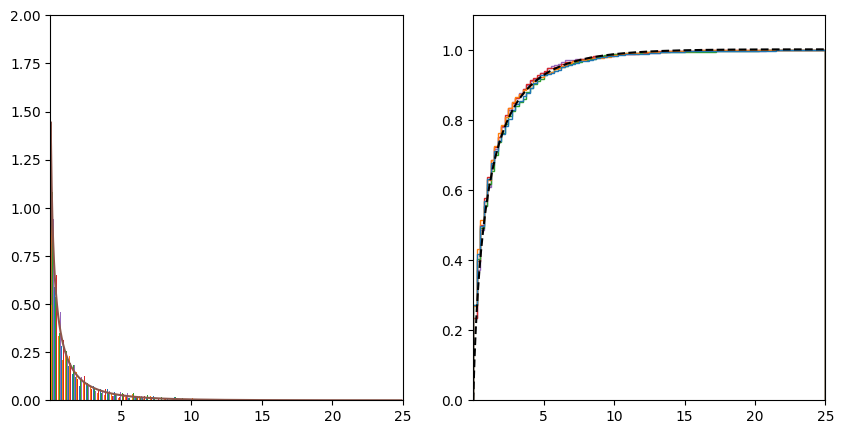

gamma_0 = 1.9829806553157914
delta_0 = 5.156690198872323
nu_max_0 = 63.06991906546676


In [20]:
from inference.BayesModel import compare_results

# mP.params
compare_results(BM, sampler, mP, mode="dynesty", biological=False)

In [4]:
from inference.BayesModel import compare_results

# compare_results(sampler,mP,mode='dynesty')

use_dynesty = True
mean = {}
for i, key in enumerate(BM.paramNames):
    if use_dynesty:
        samp = results.samples[:, i]
        weights = results.importance_weights()

    else:

        samp = results["weighted_samples"]["points"][:, i]
        weights = results["weighted_samples"]["weights"]

    mean[key] = (samp * weights).sum()
    print(f"{key} mean: {mean[key]}")

mean["nu_max"] = get_nu_max(
    mean["nu_bar"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
mean["gamma"] = get_gamma(
    mean["nu_bar"],
    mean["alpha_0"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
mean["delta"] = get_delta(
    mean["nu_bar"],
    mean["alpha_0"],
    mean["tau_A"],
    mean["tau_N"],
    mean["r_N"],
)
print("\n")
for key in ["nu_max", "gamma", "delta"]:
    print(f"{key} mean: {mean[key]}")

nu_bar mean: 1.639730456987322
alpha_0 mean: 0.025188276060235687
tau_A mean: 0.004751547999717991
tau_N mean: 0.07269929238537248
r_N mean: 0.5061837248134623


nu_max mean: 19.32539095034635
gamma mean: 1.2589635502065417
delta mean: 3.3895908683285603


data in:
gamma_1 = 1.7
delta_1 = 4.5
nu_max_1 = 25.0
nu_bar mean: 1.639730456987322
alpha_0 mean: 0.025188276060235687
tau_A mean: 0.004751547999717991
tau_N mean: 0.07269929238537248
r_N mean: 0.5061837248134623


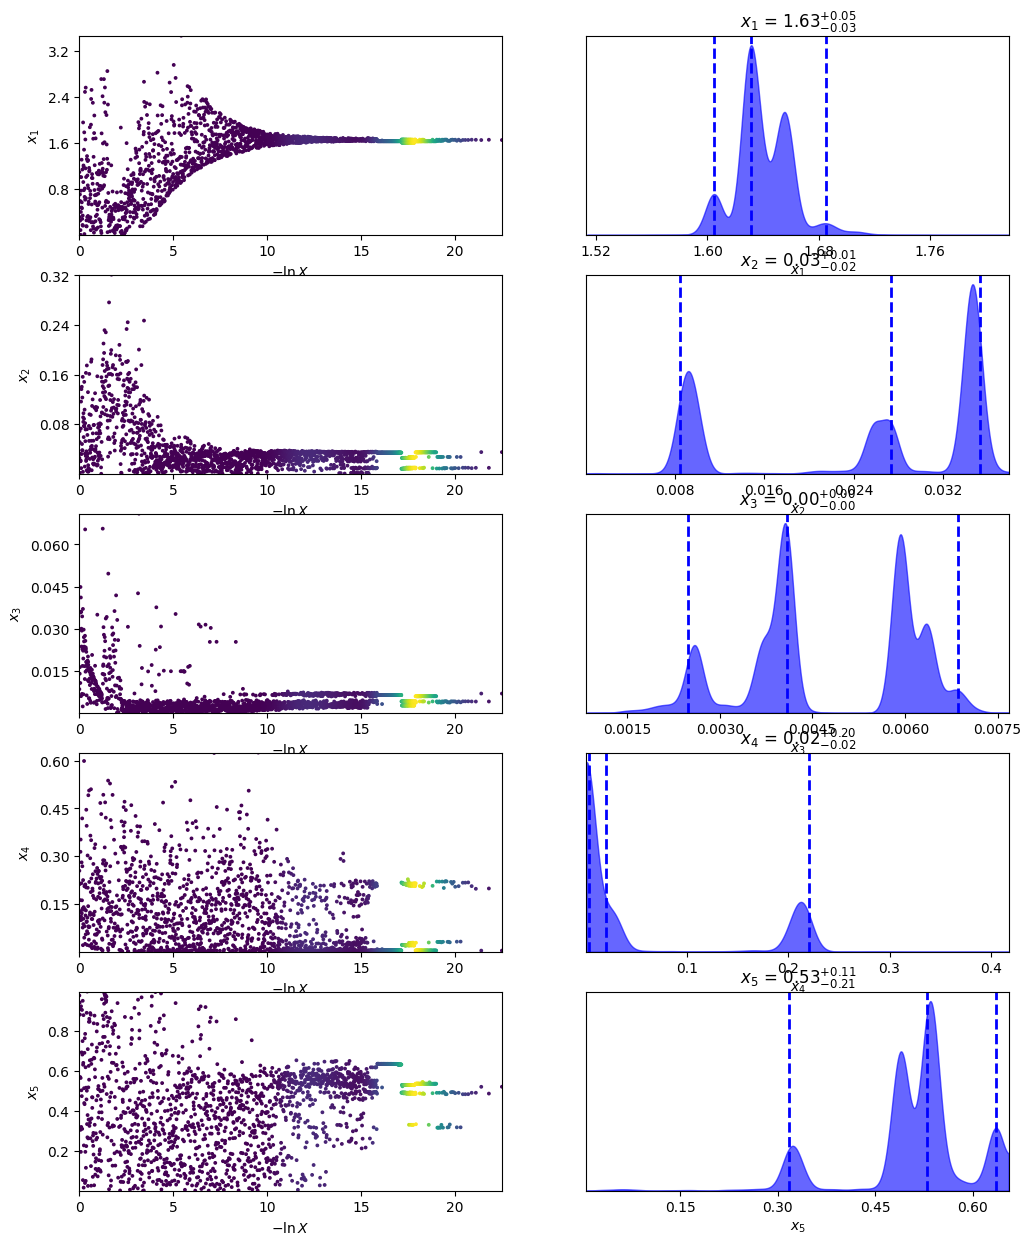

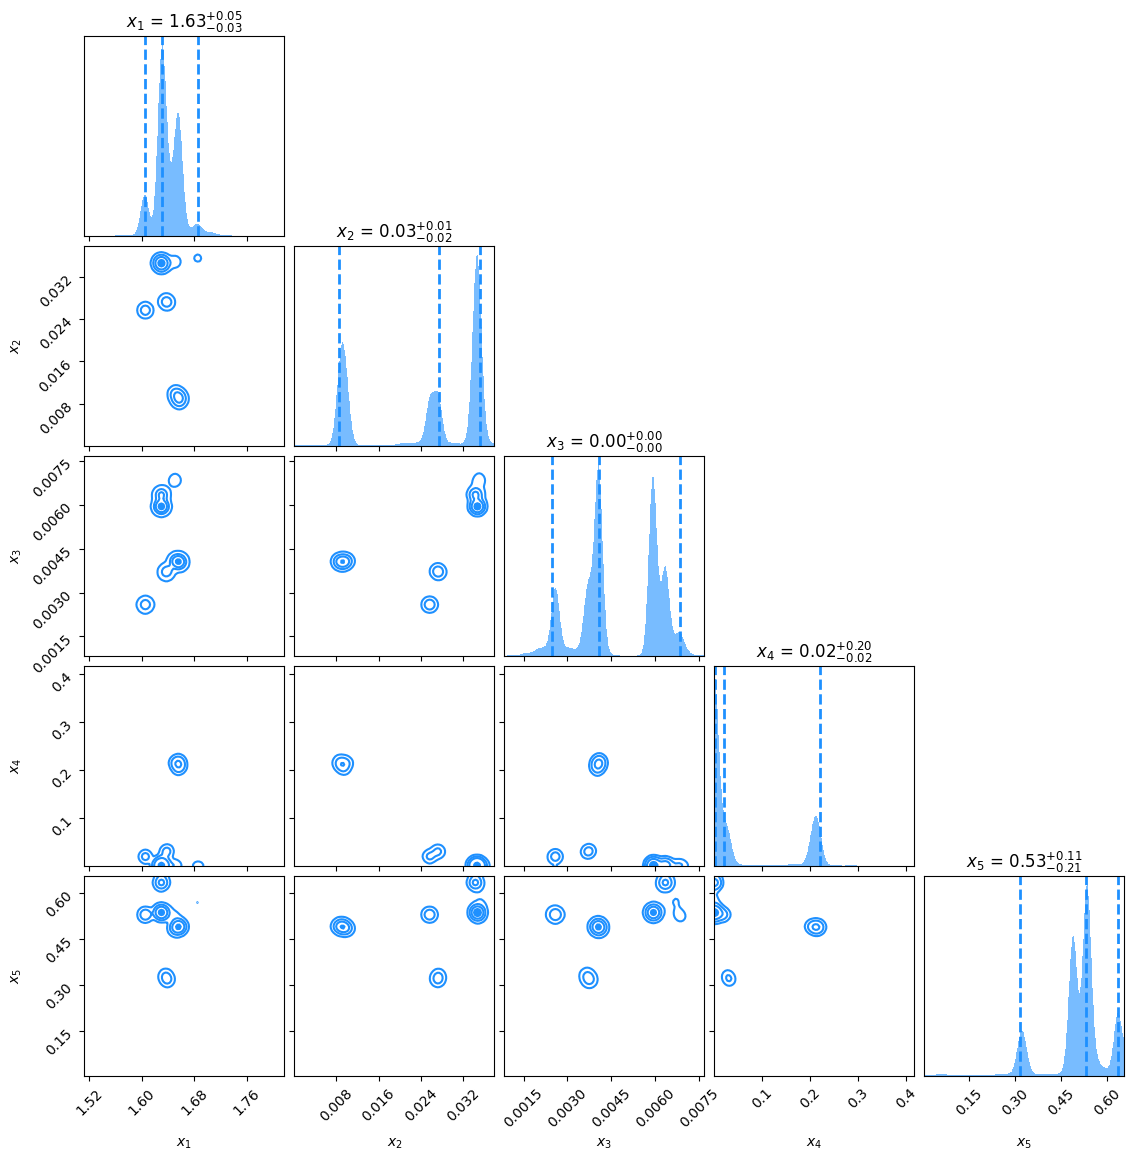


results {'nu_bar': 1.639730456987322, 'alpha_0': 0.025188276060235687, 'tau_A': 0.004751547999717991, 'tau_N': 0.07269929238537248, 'r_N': 0.5061837248134623}
self.two_pop=False


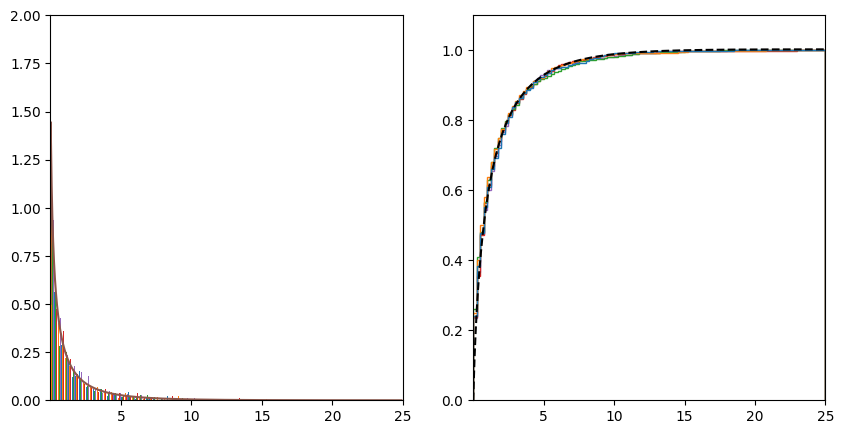

nu_bar_in=1.5959540910682242, nu_bar_out=1.6397304569873212
tau_I_in=0.004052847345693511, tau_I_out=0.00678240448600569
alpha_0_in=array([[0.0346501]]), alpha_0_out=array([[0.04555061]])
nu_bar = 1.639730456987322
alpha_0 = 0.025188276060235687
tau_A = 0.004751547999717991
tau_N = 0.07269929238537248
r_N = 0.5061837248134623


In [5]:
compare_results(BM, sampler, mP, mode="dynesty", biological=True)

In [83]:
# import numpy as np


# p_animal = my_prior_trafo(np.random.rand(BM.nParams))
# print(p_animal)
# my_logl(p_animal)

[[0.46857377 0.00843435 0.01281902 0.12912236 0.82778875]]


-4528029377.286867

In [43]:
nu_bar = 1.2
alpha_0 = 0.01
tau_A = 0.002
tau_N = 0.2
r_N = 0.0

nu_max = get_nu_max(nu_bar, tau_A, tau_N, r_N)
gamma = get_gamma(nu_bar, alpha_0, tau_A, tau_N, r_N)
delta = get_delta(nu_bar, alpha_0, tau_A, tau_N, r_N)
print(f"{nu_max=}, {gamma=}, {delta=}")

nu_max=35.588127170858854, gamma=1.5415959062386932, delta=4.658845295487262
